# Assignment 4 - Different language
In this assignment, you need to work in the same groups you already are divided into. Now you need to do what you have done before in Assignments 1, 2 and 3, but in a different language. You have to apply the tasks on the dataset that you used in Assignment 1, 2, and 3. 

You will hand in the assignment through a Jupyter notebook, along with your environment and the dataset you picked, both zipped together and submitted as one file. Please name your file so that it contains your group number. It is important that you clearly state the tasks you are performing on the dataset as questions or something similar in the notebook before you do the operations on the data. Also make sure to document your solutions and your thinking so that it can easily be followed. If you fail to do these things, you may not pass this assignment.

The deadline of this assignment is on May 24, 2025 to get bonus points, or before the exam (in which case no bonus points are awarded).

Re-submission 1 is by the end of week 33, 2025.

Re-submission 2 is by the end of week 2, 2026.

---

### *Assignement 3*

In [2]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


- - - 
## Imports and get data

In [3]:
df <- read.csv(
  "../Total air emissions by greenhouse gas.csv",
  na.strings = c("..")
)


## Data Cleaning
There is a lot of missing values and different units of measure. We should get rid of the columns with missing values and get some insight on the data. Pivoting it and using greenhouse gas + sector as column might be a good idea.

In [4]:
colSums(is.na(df))

greenhouse.gas         sector          X1990          X1991          X1992 
             0              0             42             41             41 
         X1993          X1994          X1995          X1996          X1997 
            41             41             40             40             40 
         X1998          X1999          X2000          X2001          X2002 
            39             39             39             39             39 
         X2003          X2004          X2005          X2006          X2007 
            38             38             39             39             39 
         X2008          X2009          X2010          X2011          X2012 
            39             39             39             39             38 
         X2013          X2014          X2015          X2016          X2017 
            38             39             39             39             38 
         X2018          X2019          X2020          X2021          X2022 
            39             39             40             40             40 
         X2023 
            40

We can see that a lot of data is missing in nearly every column. That's because often all the row is missing.

In [5]:
df <- drop_na(df)

We lost 44 rows which is 28% of our dataset.

As there is different unit by row .describe() would be meaningless so let's transpose the dataframe.

In [6]:
df <- df %>%
    mutate(new_column = paste(`greenhouse.gas`, sector, sep = " - ")) %>%
    select(-`greenhouse.gas`, -sector)


In [7]:
df_t <- as.data.frame(t(df), stringsAsFactors = FALSE)
df_t <- tibble::rownames_to_column(df_t, var = "new_column")
colnames(df_t) <- df_t[nrow(df_t), ]
df_t <- df_t[-nrow(df_t), ]
df_t$new_column <- gsub("^X", "", df_t$new_column)
df_t

,new_column,"Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (excluding LULUCF, excluding international transports)","Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (excluding LULUCF, including international transports)","Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (including LULUCF, excluding international transports)","Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (including LULUCF, including international transports)","Total Greenhouse Gases (kt CO2-eqv.) - OFF-ROAD VEHICLES AND OTHER MACHINERY, TOTAL","Total Greenhouse Gases (kt CO2-eqv.) - WASTE, TOTAL","Total Greenhouse Gases (kt CO2-eqv.) - ELECTRICITY AND DISTRICT HEATING, TOTAL","Total Greenhouse Gases (kt CO2-eqv.) - INDUSTRY, TOTAL","Total Greenhouse Gases (kt CO2-eqv.) - DOMESTIC TRANSPORT, TOTAL",⋯,"Sulphur Hexafluoride (SF6) (kg) - NATIONAL TOTAL (excluding LULUCF, excluding international transports)","Sulphur Hexafluoride (SF6) (kg) - NATIONAL TOTAL (excluding LULUCF, including international transports)","Sulphur Hexafluoride (SF6) (kg) - NATIONAL TOTAL (including LULUCF, excluding international transports)","Sulphur Hexafluoride (SF6) (kg) - NATIONAL TOTAL (including LULUCF, including international transports)","Sulphur Hexafluoride (SF6) (kg) - SOLVENT USE AND OTHER PRODUCT USE, TOTAL","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - NATIONAL TOTAL (excluding LULUCF, excluding international transports)","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - NATIONAL TOTAL (excluding LULUCF, including international transports)","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - NATIONAL TOTAL (including LULUCF, excluding international transports)","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - NATIONAL TOTAL (including LULUCF, including international transports)","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - SOLVENT USE AND OTHER PRODUCT USE, TOTAL"
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1990,71203.3,74942.3,11863.2,15602.2,3682.5,4275.1,6414.3,20635.6,19319.7,⋯,4461.8,4461.8,4461.8,4461.8,3461.8,104.9,104.9,104.9,104.9,81.4
2,1991,71338.8,75103.8,12988.4,16753.4,3773.5,4348.1,7383.4,20329.4,19183.7,⋯,4504.0,4504.0,4504.0,4504.0,3470.3,105.8,105.8,105.8,105.8,81.6
3,1992,71022.5,74935.1,13579.8,17492.4,4176.6,4361.5,7863.7,19006.7,20092.2,⋯,4498.9,4498.9,4498.9,4498.9,3465.2,105.7,105.7,105.7,105.7,81.4
4,1993,71242.7,75408.3,17635.4,21801.0,3930.2,4227.9,7750.7,20169.9,19324.1,⋯,4357.3,4357.3,4357.3,4357.3,3323.6,102.4,102.4,102.4,102.4,78.1
5,1994,73749.3,78554.0,18592.5,23397.2,3962.2,4081.4,8352.7,21428.9,19942.4,⋯,4665.5,4665.5,4665.5,4665.5,3498.0,109.6,109.6,109.6,109.6,82.2
6,1995,73135.2,78019.4,17858.9,22743.1,3747.9,4074.9,7500.4,22220.4,20032.4,⋯,5929.2,5929.2,5929.2,5929.2,4725.3,139.3,139.3,139.3,139.3,111.0
7,1996,77030.2,82142.9,19616.0,24728.6,3605.7,4046.2,11571.6,22260.0,19789.1,⋯,5126.1,5126.1,5126.1,5126.1,3722.2,120.5,120.5,120.5,120.5,87.5
8,1997,72145.4,78075.2,13375.8,19305.6,3636.9,4008.9,7108.4,22302.6,19869.9,⋯,6999.8,6999.8,6999.8,6999.8,5160.7,164.5,164.5,164.5,164.5,121.3
9,1998,72526.6,79334.1,13129.6,19937.0,3618.2,3950.6,7892.8,22042.0,19979.2,⋯,4878.0,4878.0,4878.0,4878.0,3207.8,114.6,114.6,114.6,114.6,75.4


In [8]:
colSums(is.na(df_t))

new_column 
                                                                                                                    0 
         Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (excluding LULUCF, excluding international transports) 
                                                                                                                    0 
         Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (excluding LULUCF, including international transports) 
                                                                                                                    0 
         Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (including LULUCF, excluding international transports) 
                                                                                                                    0 
         Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (including LULUCF, including international transports) 
                                                                                                                    0 
                                  Total Greenhouse Gases (kt CO2-eqv.) - OFF-ROAD VEHICLES AND OTHER MACHINERY, TOTAL 
                                                                                                                    0 
                                                                  Total Greenhouse Gases (kt CO2-eqv.) - WASTE, TOTAL 
                                                                                                                    0 
                                       Total Greenhouse Gases (kt CO2-eqv.) - ELECTRICITY AND DISTRICT HEATING, TOTAL 
                                                                                                                    0 
                                                               Total Greenhouse Gases (kt CO2-eqv.) - INDUSTRY, TOTAL 
                                                                                                                    0 
                                                     Total Greenhouse Gases (kt CO2-eqv.) - DOMESTIC TRANSPORT, TOTAL 
                                                                                                                    0 
                                                Total Greenhouse Gases (kt CO2-eqv.) - INTERNATIONAL TRANSPORT, TOTAL 
                                                                                                                    0 
                                                            Total Greenhouse Gases (kt CO2-eqv.) - AGRICULTURE, TOTAL 
                                                                                                                    0 
                                      Total Greenhouse Gases (kt CO2-eqv.) - SOLVENT USE AND OTHER PRODUCT USE, TOTAL 
                                                                                                                    0 
                                         Total Greenhouse Gases (kt CO2-eqv.) - HEATING OF HOUSES AND PREMISES, TOTAL 
                                                                                                                    0 
                        Total Greenhouse Gases (kt CO2-eqv.) - LAND-USE, LAND-USE CHANGE AND FORESTRY (LULUCF), TOTAL 
                                                                                                                    0 
                    Carbon Dioxide (CO2) (kt) - NATIONAL TOTAL (excluding LULUCF, excluding international transports) 
                                                                                                                    0 
                    Carbon Dioxide (CO2) (kt) - NATIONAL TOTAL (excluding LULUCF, including international transports) 
                                                                                                                    0 
                    Carbon Dioxide (CO2) (kt) - NATIONAL TOTA

In [9]:
df_t <- df_t[, colSums(is.na(df_t)) == 0]

df_t_n <- df_t %>%
    mutate(across(everything(), ~ as.numeric(.)))

summary(df_t_n)

   new_column  
 Min.   :1990  
 1st Qu.:1998  
 Median :2006  
 Mean   :2006  
 3rd Qu.:2015  
 Max.   :2023  
 Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (excluding LULUCF, excluding international transports)
 Min.   :44386                                                                                               
 1st Qu.:53333                                                                                               
 Median :65321                                                                                               
 Mean   :62314                                                                                               
 3rd Qu.:70720                                                                                               
 Max.   :77030                                                                                               
 Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (excluding LULUCF, including international transports)
 Min.   

- - -
## Plotting time series data
Let's see how the gas emission evolved over the years

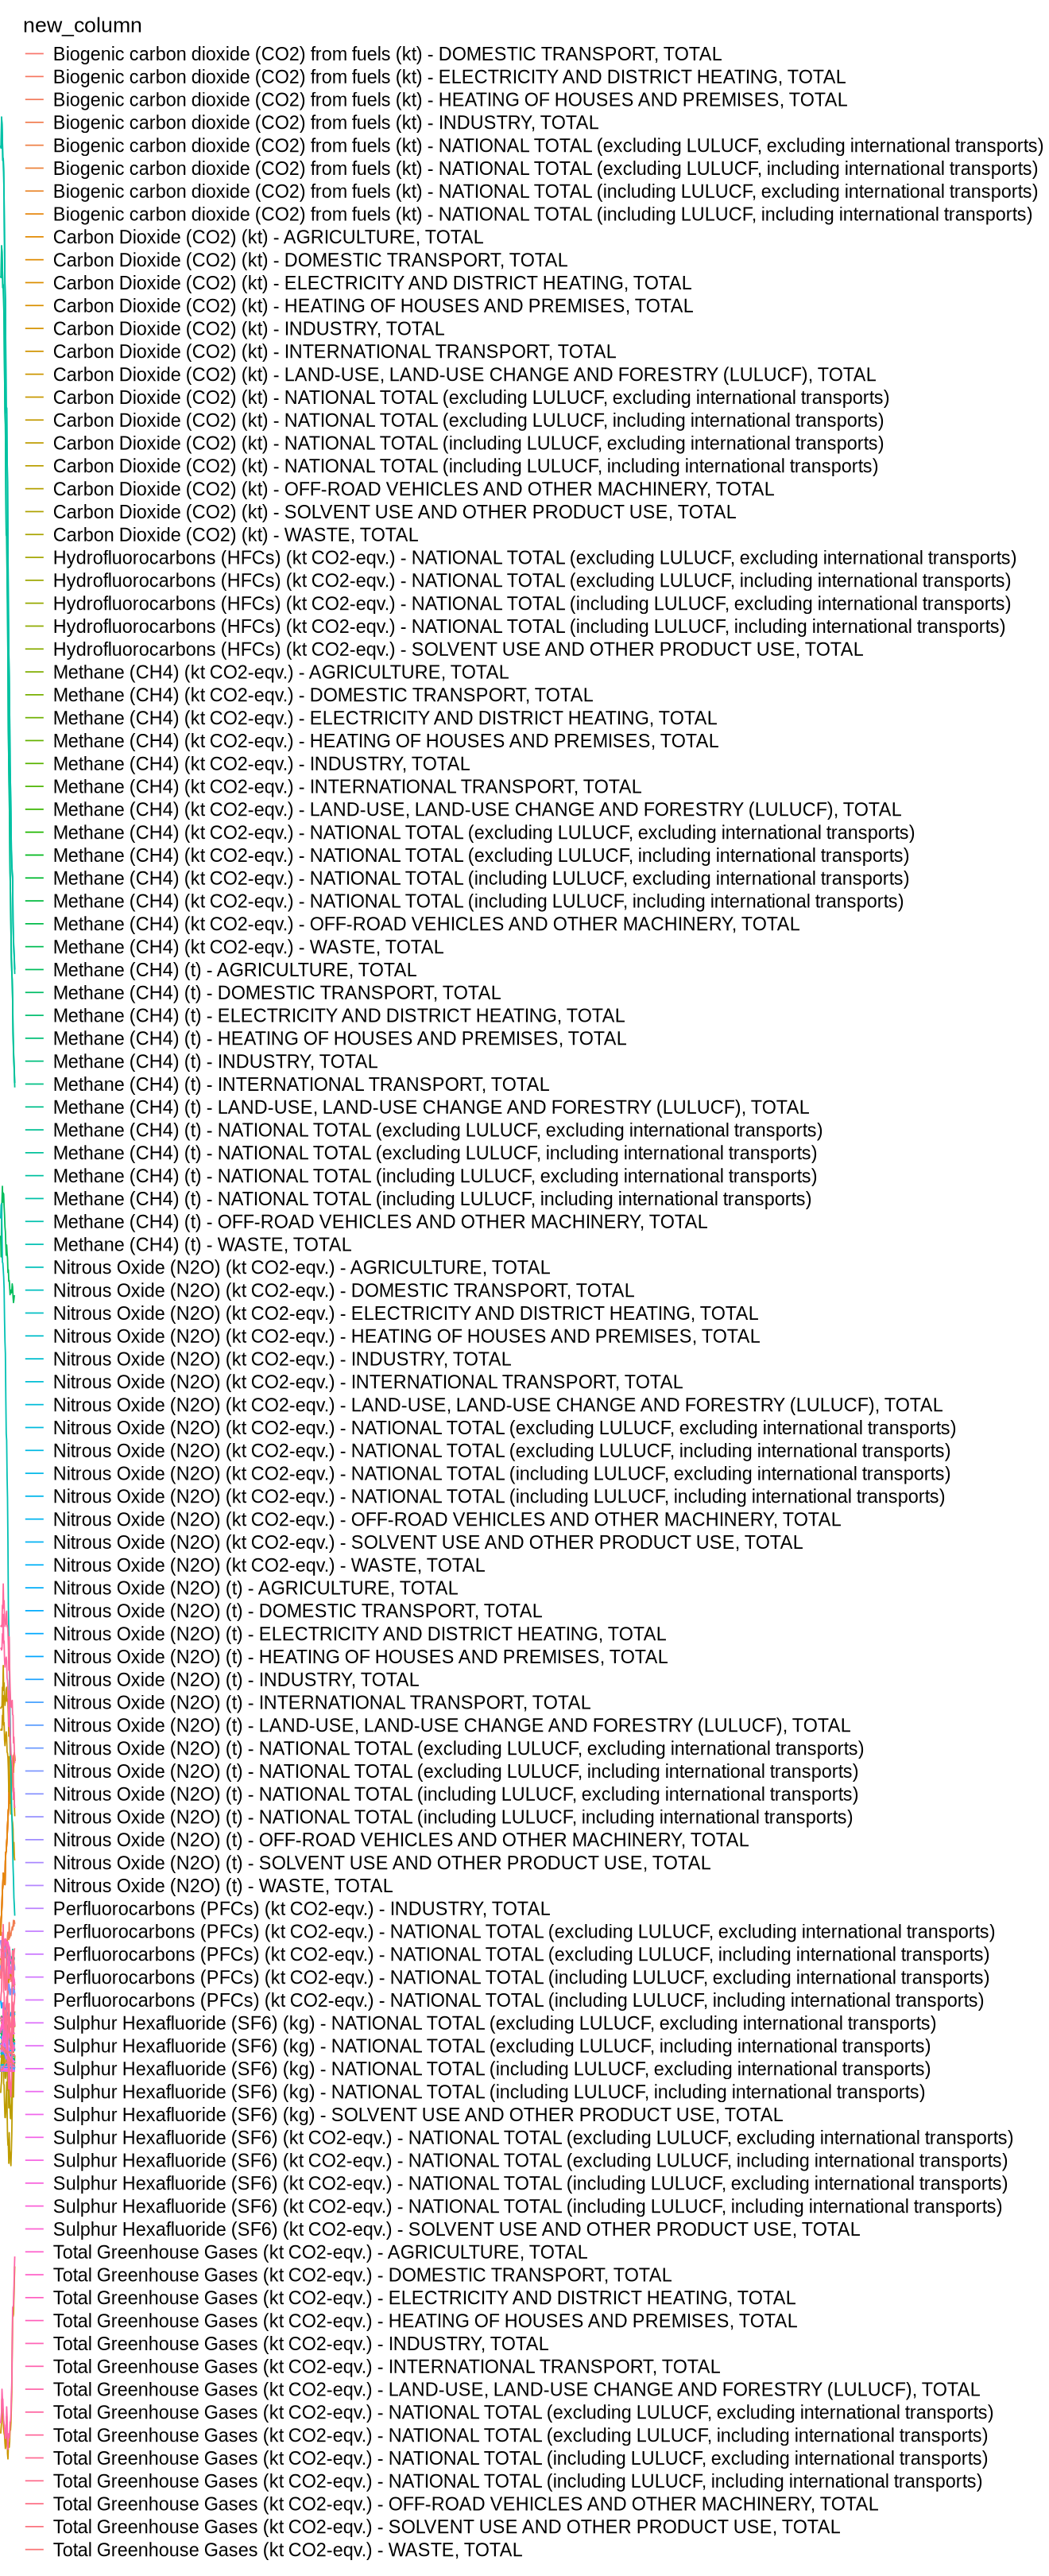

In [10]:
options(repr.plot.height = 27, repr.plot.width = 11)

df_long <- df %>%
    pivot_longer(cols = -new_column, names_to = "variable", values_to = "value") %>%
    mutate(variable = str_replace(variable, "^X", ""), variable = as.integer(variable))


ggplot(df_long, aes(x = variable, y = value, color = new_column)) +
    geom_line() +
    theme_void() +
    guides(color = guide_legend(ncol = 1)) +
    theme(
        legend.text = element_text(size = 14),
        legend.title = element_text(size = 16),
    )
    

Well... we have too much data, first let's remove the legend to see something.

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


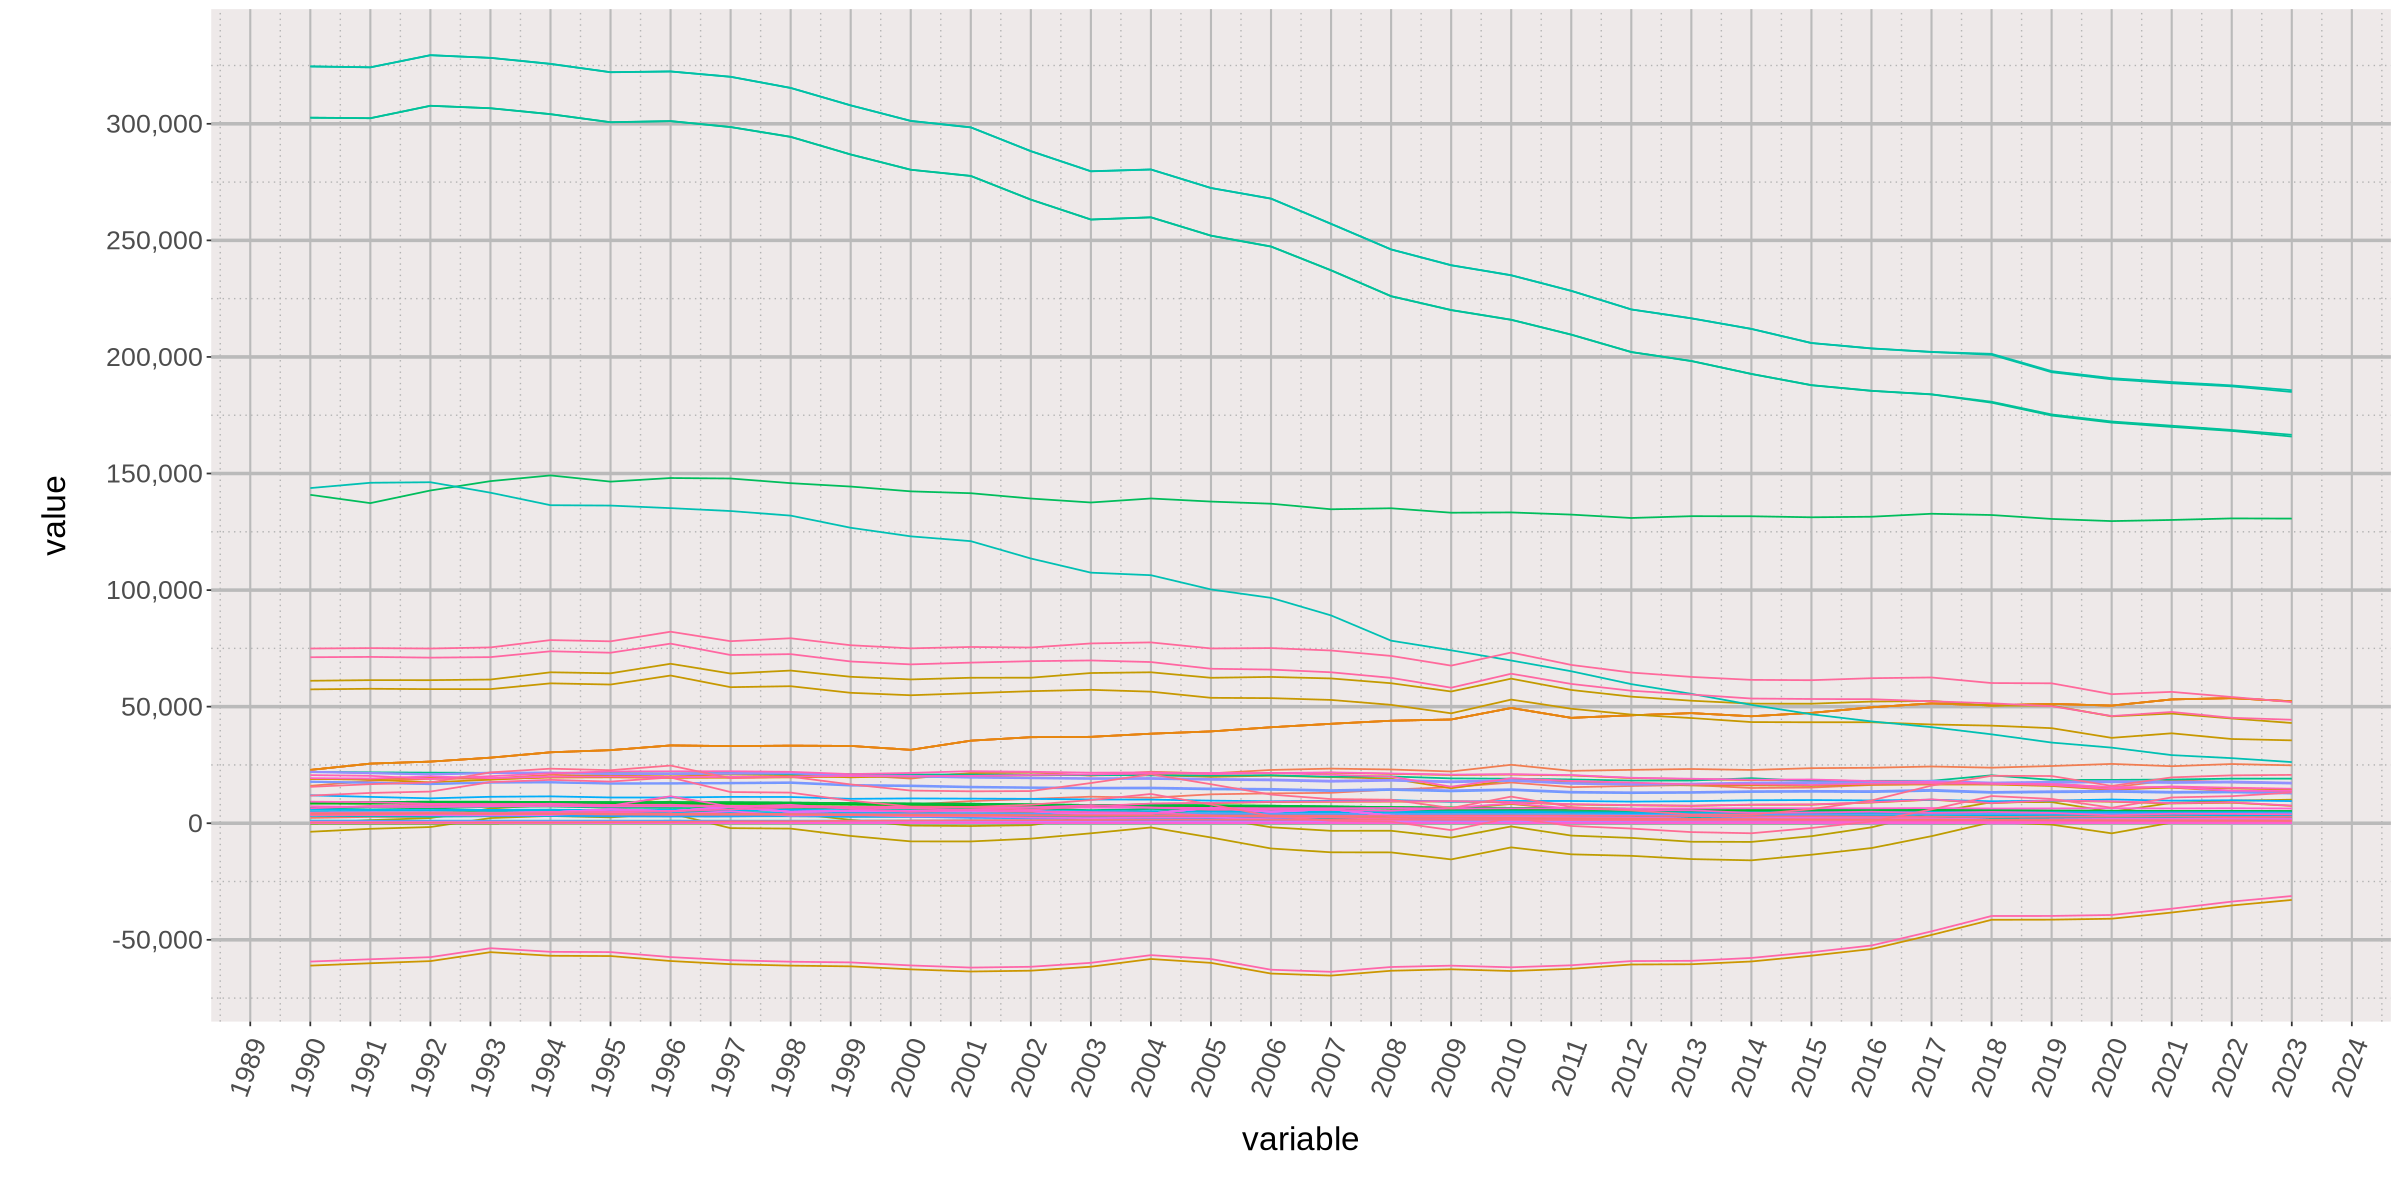

In [11]:
options(repr.plot.height = 10, repr.plot.width = 20)

ggplot(df_long, aes(x = variable, y = value, color = new_column)) +
    geom_line() +
    theme(
        legend.position = "none",
        axis.text.x = element_text(angle = 70, hjust = 0.6, vjust = 0.5, size = 16),
        axis.title.x = element_text(size = 20, margin = margin(t = 20, b = 20), ),
        axis.text.y = element_text(size = 16),
        axis.title.y = element_text(size = 20, margin = margin(r = 20, l = 20), ),

        panel.background = element_rect(fill = "snow2"),
        panel.grid.major = element_line(color = "grey70", size = 0.8),
        panel.grid.minor = element_line(color = "grey70", size = 0.4, linetype = "dotted"),
        panel.grid.major.x = element_line(color = "grey73", size = 0.6),
        panel.grid.major.y = element_line(color = "grey73", size = 1),
    ) +
    scale_y_continuous(labels = scales::label_comma(), breaks = scales::breaks_width(50000)) +
    scale_x_continuous(breaks = scales::breaks_width(1)
)




Let's only plot the total greenhouse gas and get a bigger plot

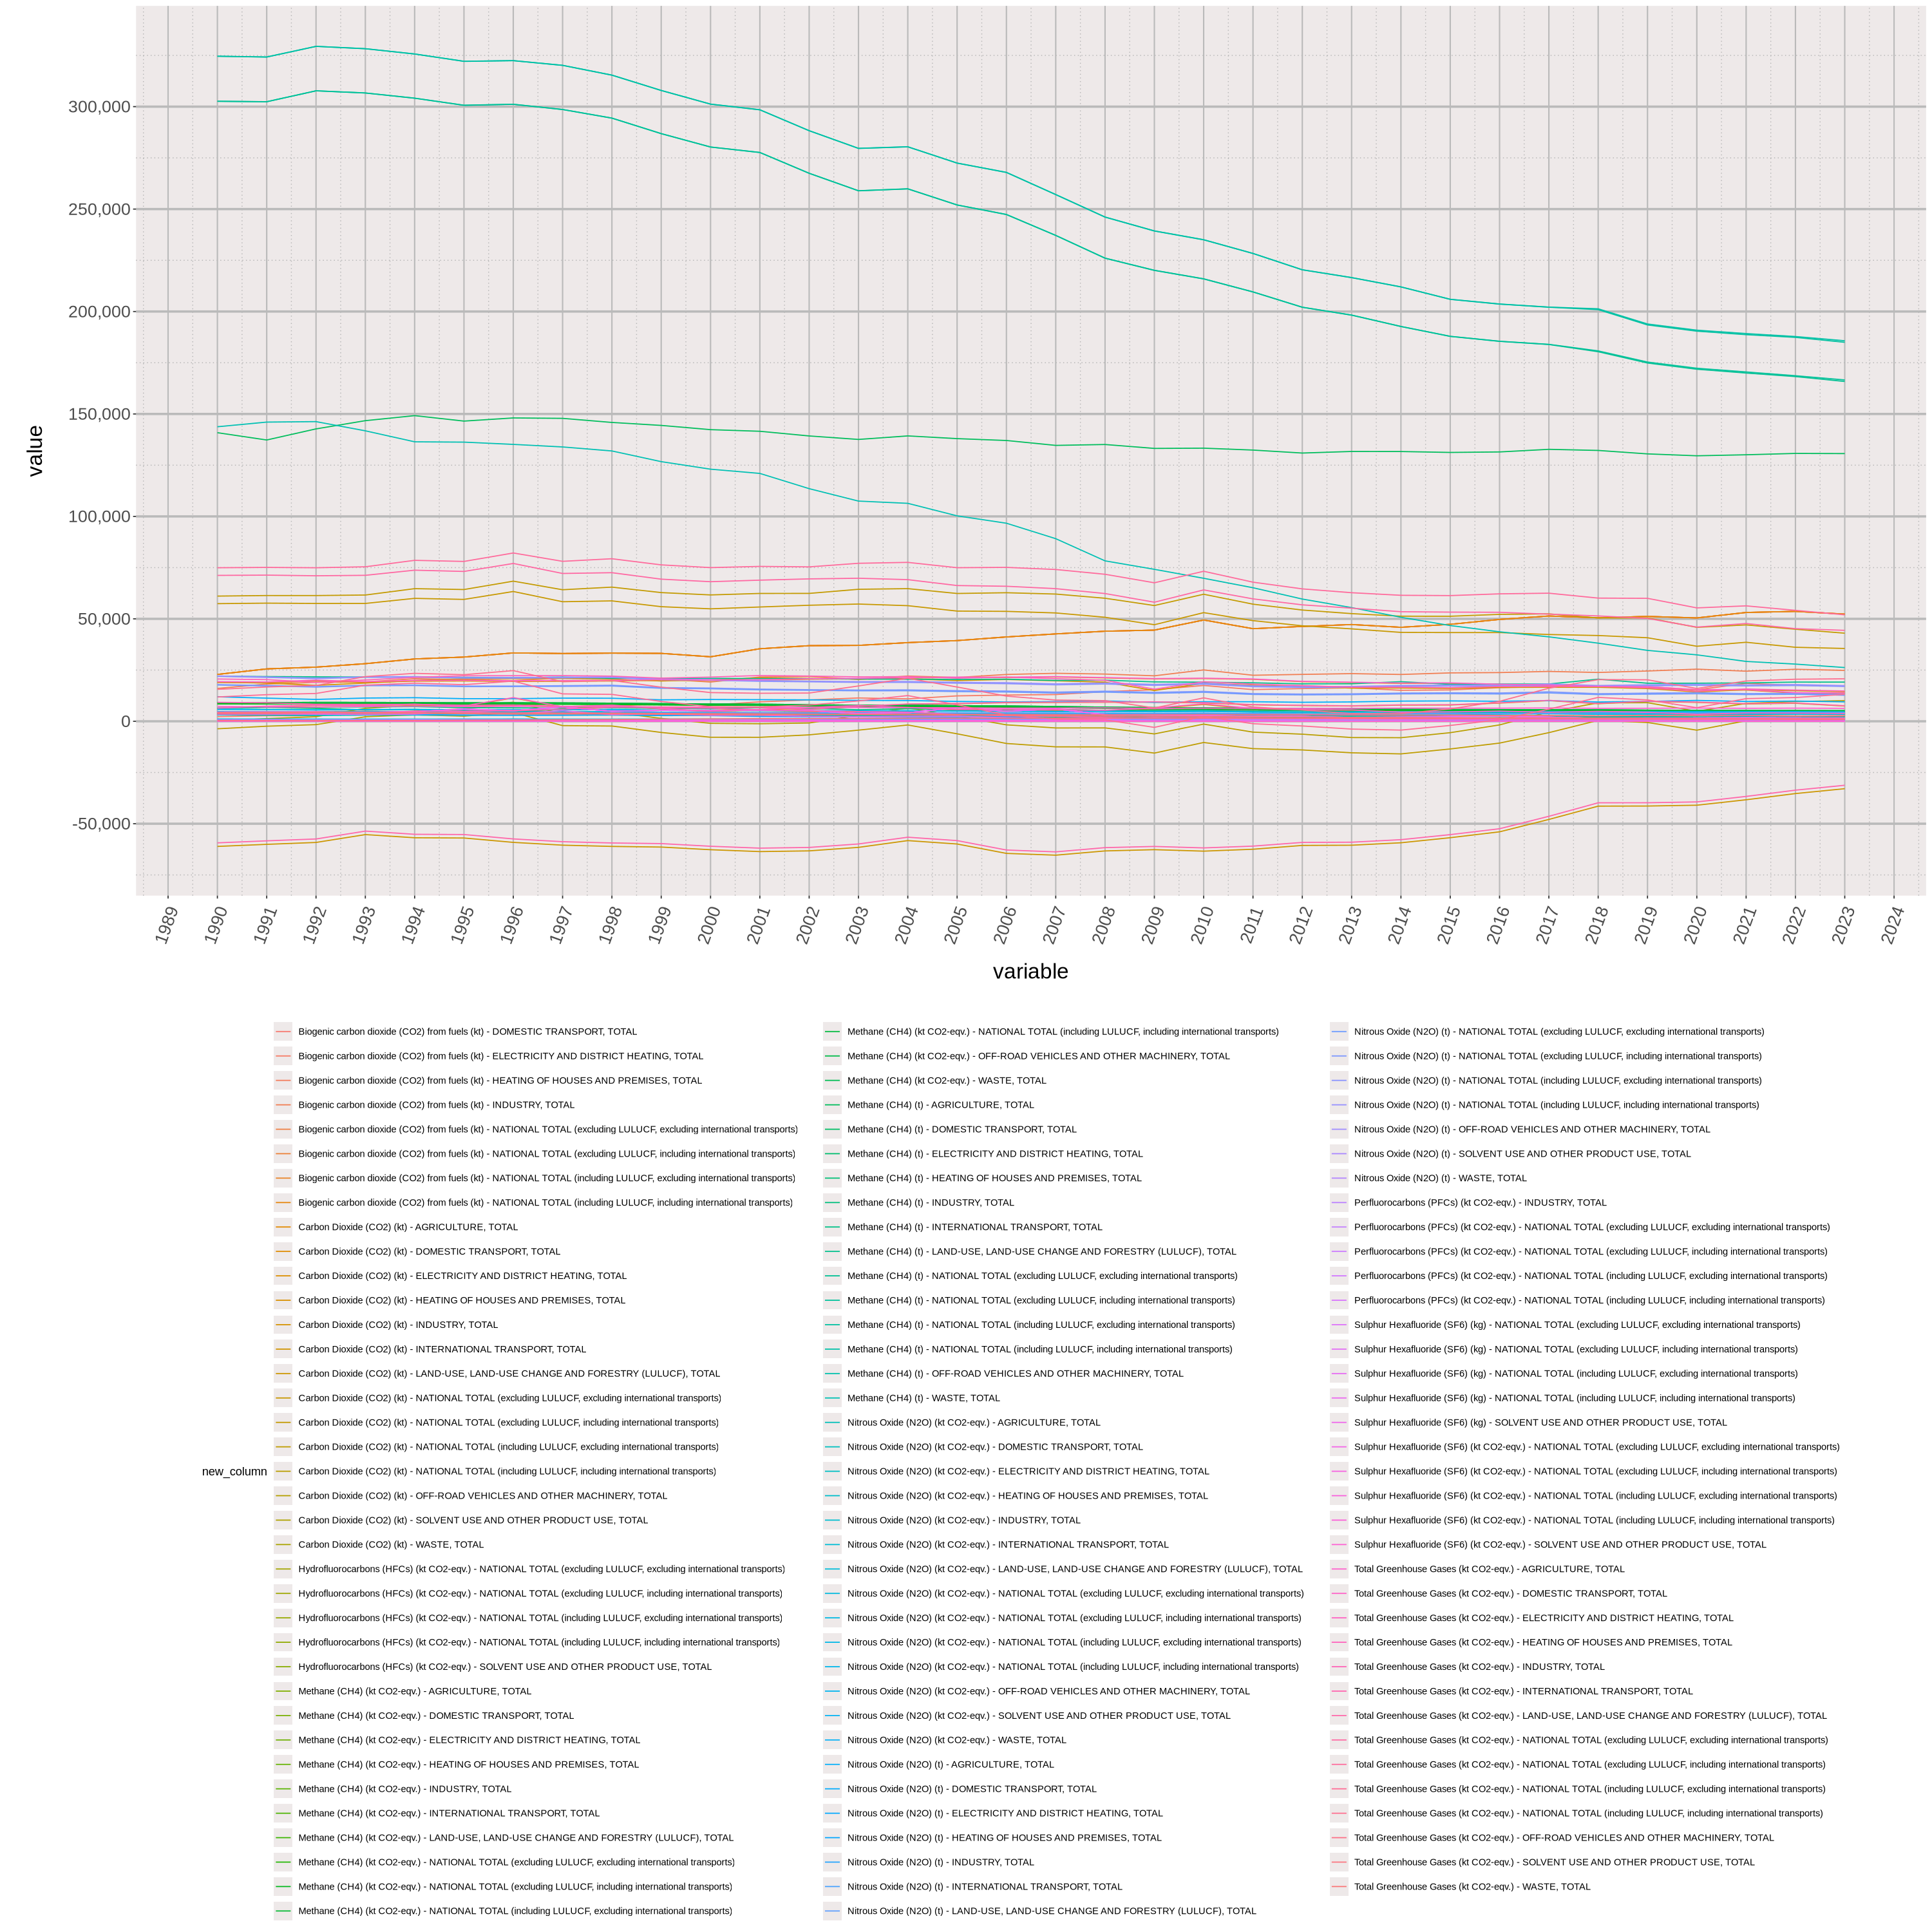

In [12]:
options(repr.plot.height = 25, repr.plot.width = 25)

ggplot(df_long, aes(x = variable, y = value, color = new_column)) +
    geom_line() +
    guides(color = guide_legend(ncol = 3)) +
    theme(
        legend.position = "bottom",

        axis.text.x = element_text(angle = 70, hjust = 0.6, vjust = 0.5, size = 16),
        axis.title.x = element_text(size = 20, margin = margin(t = 20, b = 20), ),
        axis.text.y = element_text(size = 16),
        axis.title.y = element_text(size = 20, margin = margin(r = 20, l = 20), ),

        panel.background = element_rect(fill = "snow2"),
        panel.grid.major = element_line(color = "grey70", size = 0.8),
        panel.grid.minor = element_line(color = "grey70", size = 0.4, linetype = "dotted"),
        panel.grid.major.x = element_line(color = "grey73", size = 0.6),
        panel.grid.major.y = element_line(color = "grey73", size = 1),
    ) +
    scale_y_continuous(labels = scales::label_comma(), breaks = scales::breaks_width(50000)) +
    scale_x_continuous(breaks = scales::breaks_width(1)
)

We see that a lot of line stay between 0 and 20k and don't evolve much. We also see that there is a line that goes in the negative. The extreme slowly go toward 0, which is unfortunate for the LAND USE as it absorb CO2 instead of emiting it.